In [1]:
import numpy as np
#from tabulate import tabulate
import pandas as pd
import tkinter as tk
import matplotlib.pyplot as plt
import math as mt
import os
from MyFunction import *
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

Welcome to JupyROOT 6.21/01


### Beam Parameters:  

Transfer matrix for a focusing magnet,

\begin{pmatrix}
cos \sqrt{\lvert K \lvert}L & \frac{1}{\lvert K \lvert} sin\sqrt{\lvert K \lvert}L\\
-\sqrt{\lvert K \lvert}sin\sqrt{\lvert K \lvert}L & cos\sqrt{\lvert K \lvert}L
\end{pmatrix}

For thin lens approximation,

\begin{pmatrix}
1 & 0\\
-\lvert K \lvert L & 1
\end{pmatrix}

Propagation of Twiss parameters in a thin focusing quadrupole,

\begin{gather}
 \begin{pmatrix} \beta \\ \alpha \\ \gamma \end{pmatrix}
 =
  \begin{pmatrix}
   1 & 0 & 0 \\
   KL & 1 & 0 \\
   (KL)^2 & 2KL & 1
  \end{pmatrix}
  \begin{pmatrix} \beta_{0} \\ \alpha_{0} \\ \gamma_{0} \end{pmatrix}   
\end{gather}

Equation for thin lens:
\begin{equation}
\beta  = \beta_{0} \\
\alpha = \alpha_{0} +  \beta_{0}( KL) \\
\gamma = \gamma_{0} + 2\alpha_{0}(KL) + \beta_{0}(KL)^2 
\end{equation}


Solving these equations,
\begin{equation}
KL = \frac{\alpha -\alpha_{0}}{\beta_{0}}
\end{equation}

Propagation of Twiss parameters in drift space,

\begin{gather}
 \begin{pmatrix} \beta \\ \alpha \\ \gamma \end{pmatrix}
 =
  \begin{pmatrix}
   1 & -2s & s^2 \\
   0 & 1 & -s \\
   0 & 0 & 1
  \end{pmatrix}
  \begin{pmatrix} \beta_{0} \\ \alpha_{0} \\ \gamma_{0} \end{pmatrix}   
\end{gather}

Equation for drift space:
\begin{equation}
\beta =  \beta_{0} -2\alpha_{0}s + \gamma_{0}s^2 \\
\alpha = \alpha_{0} - \gamma_{0}s\\
\gamma = \gamma_{0}
\end{equation}

Depth of Smallest Betta:
\begin{equation}
s = \frac{\alpha_{0}\beta_{0}}{1+\alpha_{0}^2} 
\end{equation}

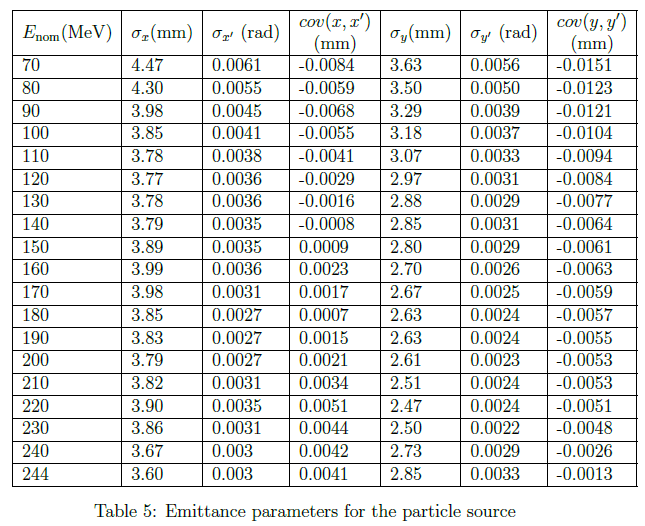

In [6]:
from IPython.display import Image
Image(filename='/home/fardous/Desktop/Thesis Documents/BeamParameters.png')
# Image(filename='/home/fardous/Desktop/Thesis Documents/BeamProperties.png')

In [11]:
# focal_length = 1/KL 
# KL = (alpha - alpha0)/beta0

Energy = np.array([i for i in range(70,250, 10)])

sigma_x_pos = np.array([4.47, 4.30, 3.98, 3.85, 3.78, 3.77, 3.78, 3.79, 3.89, 3.99, 3.98, 3.85, 3.83, 3.79, 3.82, 3.90, 3.86, 3.67])
sigma_x_dir = np.array([.0061, .0055, .0045, .0041, .0038, .0036, .0036, .0035, .0035, .0036, .0031, .0027, .0027, .0027, .0031, .0035, .0031, .003])
cov_x       = np.array([-.0084, -.0059, -.0068, -.0055, -.0041, -.0029, -.0016, -.0008, .0009, .0023, .0017, .0007, .0015, .0021, .0034, .0051, .0044, .0042])

sigma_y_pos = np.array([3.63, 3.50, 3.29, 3.18, 3.07, 2.97, 2.88, 2.85, 2.80, 2.70, 2.67, 2.63, 2.63, 2.61, 2.51, 2.47, 2.50, 2.73])
sigma_y_dir = np.array([.0056, .0050, .0039, .0037, .0033, .0031, .0029, .0031, .0029, .0026, .0025, .0024, .0024, .0023, .0024, .0024, .0022, .0029])
cov_y       = np.array([-.0151, -.0123,  -.0121, -.0104, -.0094, -.0084, -.0077, -.0064, -.0061, -.0063, -.0059, -.0057, -.0055, -.0053, -.0053, -.0051, -.0048, -.0026])

Emittance_x = np.sqrt(sigma_x_pos**2*sigma_x_dir**2-cov_x**2)
Emittance_y = np.sqrt(sigma_y_pos**2*sigma_y_dir**2-cov_y**2)

alpha_x = cov_x/Emittance_x
alpha_y = cov_y/Emittance_y

beta_x  = (sigma_x_pos**2/Emittance_x)/1000
beta_y  = (sigma_y_pos**2/Emittance_y)/1000

gamma_x = (1 + alpha_x**2)/beta_x
gamma_y = (1 + alpha_y**2)/beta_y

df = pd.DataFrame({"Energy/MeV": Energy, "Alpha(x)":alpha_x, "Beta(x)/m": beta_x, "Gamma(x)":gamma_x, "Emittance_x/um":Emittance_x*1000,\
                   "Alpha(y)":alpha_y,"Beta(y)/m":beta_y, "Gamma(y)":gamma_y, "Emittance_y/um":Emittance_y*1000})
from IPython.display import display 
display(df)

,Energy/MeV,Alpha(x),Beta(x)/m,Gamma(x),Emittance_x/um,Alpha(y),Beta(y)/m,Gamma(y),Emittance_y/um
0,70,-0.323813,0.770248,1.434415,25.940881,-1.109522,0.968216,2.304278,13.609467
1,80,-0.257617,0.807345,1.320832,22.902238,-0.988087,0.984071,2.008307,12.448293
2,90,-0.410408,0.956033,1.222170,16.568890,-2.834372,2.535498,3.562876,4.269023
3,100,-0.371727,1.001803,1.136132,14.795818,-1.890011,1.837745,2.487909,5.502614
4,110,-0.297826,1.037916,1.048929,13.766426,-2.487751,2.494341,2.882086,3.778513
5,120,-0.218727,1.071980,0.977482,13.258551,-2.228434,2.340095,2.549435,3.769463
6,130,-0.118399,1.057334,0.959033,13.513610,-2.380139,2.563874,2.599607,3.235105
7,140,-0.060419,1.084832,0.925167,13.240854,-1.050774,1.333580,1.577803,6.090749
8,150,0.066248,1.113865,0.901715,13.585221,-1.138163,1.462819,1.569172,5.359515
9,160,0.162216,1.122821,0.914049,14.178663,-2.034334,2.354015,2.182872,3.096837


In [21]:
alpha0 = 18
beta0  = 2.82
gamma = (1 + alpha0**2)/beta0

print(alpha0*1000/gamma)

156.18461538461537


In [85]:
Energy = 350 #MeV 
alpha  = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
depth  = Energy2Range(Energy)
beta   = 0.1 * (1+alpha**2)/alpha
print(beta)


sigma0 = 15/1000

emittance =  sigma0**2/beta
print(emittance*1000000)

# emittance = 10/1000000 
# sigma0    = np.sqrt(emittance*beta)
# print(sigma0*1000)

df = pd.DataFrame({"Alpha":alpha, "Beta/m": beta, "Emittance_x/um":emittance*1000000,"Sigma/mm":sigma0*1000})


from IPython.display import display 
display(df)

[0.2        0.25       0.33333333 0.425      0.52       0.61666667
 0.71428571 0.8125     0.91111111 1.01       1.10909091 1.20833333
 1.30769231 1.40714286 1.50666667 1.60625    1.70588235 1.80555556
 1.90526316 2.005     ]
[1125.          900.          675.          529.41176471  432.69230769
  364.86486486  315.          276.92307692  246.95121951  222.77227723
  202.86885246  186.20689655  172.05882353  159.89847716  149.33628319
  140.07782101  131.89655172  124.61538462  118.09392265  112.21945137]


,Alpha,Beta/m,Emittance_x/um,Sigma/mm
0,1,0.200000,1125.000000,15.0
1,2,0.250000,900.000000,15.0
2,3,0.333333,675.000000,15.0
3,4,0.425000,529.411765,15.0
4,5,0.520000,432.692308,15.0
5,6,0.616667,364.864865,15.0
6,7,0.714286,315.000000,15.0
7,8,0.812500,276.923077,15.0
8,9,0.911111,246.951220,15.0
9,10,1.010000,222.772277,15.0


In [23]:
r = Energy2Range(150)
print(r*10)emittance

156.93429735258127


In [6]:


s      = 0.100
alpha0 = 10
beta0  = (s*(1+alpha0**2))/alpha0

print(beta0)

1.0100000000000002


[0.001125   0.0009     0.000675   0.00052941 0.00043269 0.00036486
 0.000315   0.00027692 0.00024695 0.00022277 0.00020287 0.00018621
 0.00017206 0.0001599  0.00014934 0.00014008 0.0001319  0.00012462
 0.00011809 0.00011222]


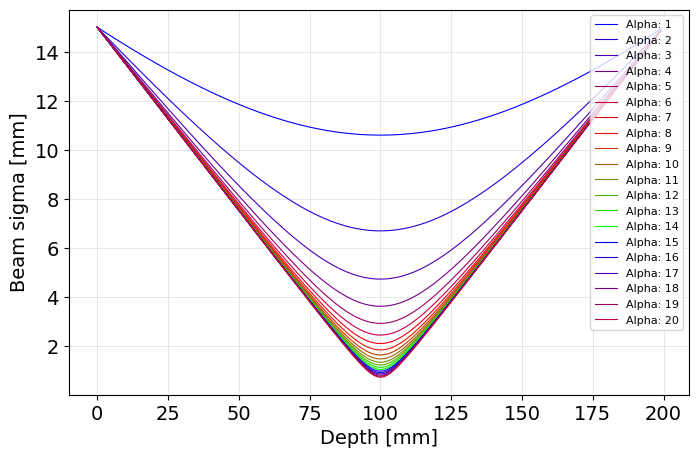

In [78]:
s = np.arange(start=0, stop=.2, step=.001) 
# Calculate beta for High energy beam

plt.rcdefaults()
params = {'figure.figsize'   : (8, 5),
          'legend.fontsize'  : 8,
          'axes.labelsize'   : 14,
          'axes.titlesize'   : 14,
          'xtick.labelsize'  : 14,
          'ytick.labelsize'  : 14,
          'axes.facecolor'   : 'white'}
pylab.rcParams.update(params)

colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.brg(np.linspace(0, 1, 14))))


alpha0_List = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
beta0_List  = (0.1*(1+alpha**2))/alpha
sigma0 = 15/1000
emittance_List = sigma0**2/beta0_List
print(emittance_List)

for i in range(len(alpha0_List)):
    alpha0 =  alpha0_List[i]
    beta0  =  beta0_List[i]
    emittance = emittance_List[i]
    gamma0 = (1+alpha0**2)/beta0
    beta   = beta0 -(2*alpha0*s)+gamma0*s**2 
    sigma  = np.sqrt(beta*emittance)
    
    plt.plot(s*1000, sigma*1000, label = "Alpha: "+str(alpha0_List[i]), linewidth=0.8)
    plt.grid(alpha =0.25, axis='both' , color='gray', linestyle='-', linewidth=.5)
    plt.legend(loc='upper right')
    plt.xlabel("Depth [mm]")
    plt.ylabel("Beam sigma [mm]")
    
plt.savefig("/home/fardousr/Desktop/Output/Graphs/Free spave propagation for constant initial sigma.png", dpi = 500)
plt.show()

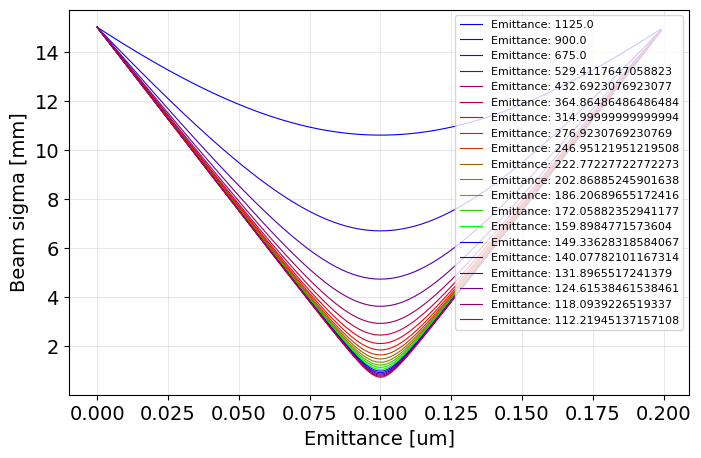

In [72]:
s = np.arange(start=0, stop=.2, step=.001) 
# Calculate beta for High energy beam

plt.rcdefaults()
params = {'figure.figsize'   : (8, 5),
          'legend.fontsize'  : 8,
          'axes.labelsize'   : 14,
          'axes.titlesize'   : 14,
          'xtick.labelsize'  : 14,
          'ytick.labelsize'  : 14,
          'axes.facecolor'   : 'white'}
pylab.rcParams.update(params)

colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.brg(np.linspace(0, 1, 14))))


alpha0_List = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
beta0_List  = (0.1*(1+alpha**2))/alpha

sigma0 = 15/1000

for i in range(len(alpha0_List)):
    alpha0 =  alpha0_List[i]
    beta0  =  beta0_List[i]
    emittance = sigma0**2/beta0
    gamma0 = (1+alpha0**2)/beta0
    beta   = beta0 -(2*alpha0*s)+gamma0*s**2 
    sigma  = np.sqrt(beta*emittance)
    
    plt.plot(s, sigma*1000, label = "Emittance: "+str(emittance*1000000), linewidth=0.8)
    plt.grid(alpha =0.25, axis='both' , color='gray', linestyle='-', linewidth=.5)
    plt.legend(loc='upper right')
    plt.xlabel("Emittance [um]")
    plt.ylabel("Beam sigma [mm]")
    

plt.show()